In [11]:
#Importação de Bibliotecas

import pandas as pd #biblioteca pandas - analise de dados
import matplotlib.pyplot as plt #biblioteca de graficos
from statsmodels.tsa.seasonal import seasonal_decompose #Time Series Analysis


In [12]:
#Outra maneira de ler o que tem na tabela est_est_log - usando o parametro index

eel = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
eel.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1,1408122540,Giovanny,Swiss A,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
2,1408122540,Giovanny,Swiss A,2,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
3,1408122540,Giovanny,Swiss B,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
4,1408122540,Giovanny,Swiss B,3,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
5,1408122540,Giovanny,Swiss B,4,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA


In [13]:
#Outra forma de filtrar as colunas 

num_nasc = eel[(eel['util'] == 'nasc') & (eel['num_nasc'] < 200)] #Criada a variável que em eel estão as informações dentro da coluna util e printando domente o que for nasc
num_nasc.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,1411494033,Tania,Swiss E,5,AAA,666,54,nasc,666,666,...,1409072767,1411494033,5,1413308433,666,666,666,666,AAA,AAA
117,1411494033,Tania,Swiss E,10,AAA,666,56,nasc,666,666,...,1409073259,1411494033,10,1413308433,666,666,666,666,AAA,AAA
118,1411494033,Tania,Swiss C,20,AAA,666,62,nasc,666,666,...,1409075167,1411494033,20,1413308433,666,666,666,666,AAA,AAA
119,1411494047,Tania,Swiss E,10,AAA,666,116,nasc,666,666,...,1409072767,1411494047,10,1413308447,666,666,666,666,AAA,AAA
120,1411494047,Tania,Swiss E,20,AAA,666,117,nasc,666,666,...,1409073259,1411494047,20,1413308447,666,666,666,666,AAA,AAA


In [26]:
type(num_nasc)

pandas.core.frame.DataFrame

In [14]:
#Arrumando a formatação das colunas "datas" com lambda

# datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex', 'data_solic', 'data_forn', 'data_fim']
a = [1,2,3,4,5]
l = pd.Series(map(lambda toDatetime: toDatetime+1, a))
l[:10]

0    2
1    3
2    4
3    5
4    6
dtype: int64

In [15]:
#Alterando as colunas de datas em formato de datetime

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex', 'data_solic', 'data_forn', 'data_fim']

#função stack serve para sobrepor as colunas tornando-as em séries// unstack é para voltar a torna-las em uma dataframe
#Foi necessária essa função, pois .to_datetime não funciona em DataFrame, tendo que torna=la série e depois novamente como datafram
num_nasc = pd.to_datetime(num_nasc[datas].stack(), unit='s').unstack() 
num_nasc.head()

,date_hoje,date_nasc,data_inicio,date_acas,date_nasc_acas,date_sex,data_solic,data_forn,data_fim
id,,,,,,,,,
116,2014-09-23 17:40:33,1970-01-01 00:11:06,1970-01-01 00:11:06,2014-08-26 17:06:07,2014-09-23 17:40:33,2014-10-14 17:40:33,1970-01-01 00:11:06,1970-01-01 00:11:06,1970-01-01 00:11:06
117,2014-09-23 17:40:33,1970-01-01 00:11:06,1970-01-01 00:11:06,2014-08-26 17:14:19,2014-09-23 17:40:33,2014-10-14 17:40:33,1970-01-01 00:11:06,1970-01-01 00:11:06,1970-01-01 00:11:06
118,2014-09-23 17:40:33,1970-01-01 00:11:06,1970-01-01 00:11:06,2014-08-26 17:46:07,2014-09-23 17:40:33,2014-10-14 17:40:33,1970-01-01 00:11:06,1970-01-01 00:11:06,1970-01-01 00:11:06
119,2014-09-23 17:40:47,1970-01-01 00:11:06,1970-01-01 00:11:06,2014-08-26 17:06:07,2014-09-23 17:40:47,2014-10-14 17:40:47,1970-01-01 00:11:06,1970-01-01 00:11:06,1970-01-01 00:11:06
120,2014-09-23 17:40:47,1970-01-01 00:11:06,1970-01-01 00:11:06,2014-08-26 17:14:19,2014-09-23 17:40:47,2014-10-14 17:40:47,1970-01-01 00:11:06,1970-01-01 00:11:06,1970-01-01 00:11:06


In [16]:
#variável eel (tabela est_est_log)do tipo dataframe que serve para ler o arquivo csv que é a tabela est_est_log 
eel = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv').set_index('id') 
eel.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1,1408122540,Giovanny,Swiss A,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
2,1408122540,Giovanny,Swiss A,2,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
3,1408122540,Giovanny,Swiss B,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
4,1408122540,Giovanny,Swiss B,3,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
5,1408122540,Giovanny,Swiss B,4,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA


In [17]:
#variável do tipo dataframe utilizando a função query que serve como um filtro pendindo apenas a coluna "util" com numero de nascidos inferior a 200.

num_sex = eel.query("util == 'nasc' & num_nasc < 200")

#lista com nome das colunas referentes a datas
datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex', 'data_solic', 'data_forn', 'data_fim']

#laço que em c percorre em datas e padronizando tudo em formato de data pela função to_datetime
for c in datas:
    num_sex[c] = pd.to_datetime(num_sex[c], unit = 's') #indica o formato das datas
    
num_sex.head() 

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [18]:
#lista criada para filtrar nome de linhagens que não serão usadas
#Laço for para percorrer na coluna ling e printar somente o que não for nenhuma das linhagens na coluna.

ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]
    
for l in ling_ex:
    tirar_ling = num_sex.query("ling != ' + l + '")
tirar_ling.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [19]:
#Variável do tipo DataFrame criada para concatenar as linhagens restantes
#Talvez não seja utilizada
conc_lin = pd.DataFrame(tirar_ling['ling']) #criação da DataFrame "tirar_ling com a coluna de data"
conc_lin['num_nasc'] = tirar_ling['num_nasc']#criação de coluna(serie_temp) que estará inserida na DataFrame
conc_lin = conc_lin.set_index('ling')
conc_lin.head()

,num_nasc
ling,
Swiss E,5
Swiss E,10
Swiss C,20
Swiss E,10
Swiss E,20


In [20]:
#Variável do tipo DataFrame criada para gerar gráficos de Séries temporais

serie_temp = pd.DataFrame(tirar_ling['date_hoje']) #criação da DataFrame "tirar_ling com a coluna de data"
serie_temp['num_nasc'] = tirar_ling['num_nasc']#criação de coluna(serie_temp) que estará inserida na DataFrame
serie_temp = serie_temp.set_index('date_hoje') #identificando a nova coluna como index data_hoje
serie_temp.head()
#type(serie_temp)

,num_nasc
date_hoje,
2014-09-23 17:40:33,5
2014-09-23 17:40:33,10
2014-09-23 17:40:33,20
2014-09-23 17:40:47,10
2014-09-23 17:40:47,20


Text(0, 0.5, 'Soma de animais')

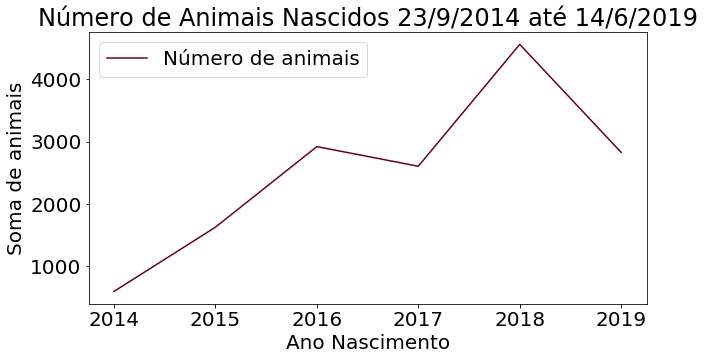

In [25]:
#Plotagem de gráfico para agrupar e somar dados durante os anos que foram feitos registros

inic = tirar_ling.loc[tirar_ling.index.min(), "date_hoje"] #loc: localizador - localizando a primeira data
fim = tirar_ling.loc[tirar_ling.index.max(), "date_hoje"]


tsAno = serie_temp.resample('A').sum() #resample('A') agrupamento por ano, sum() somando os dados

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

tsAno.plot(
    figsize=(10, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)

plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 20 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 20

plt.legend(['Número de animais'])
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')

Text(0, 0.5, 'Soma Nascidos')

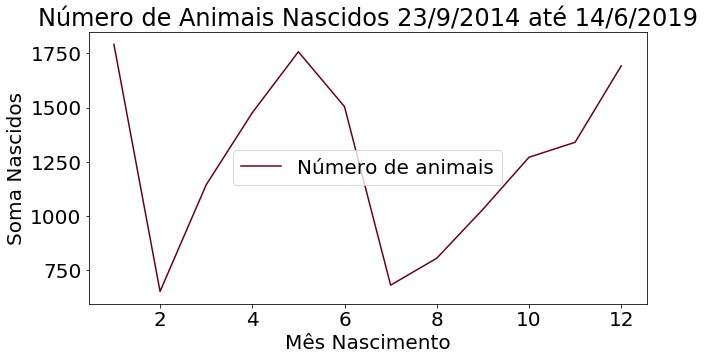

In [24]:
#Plotagem de gráfico agrupando mês a mês

tsMes = serie_temp.groupby([lambda x: x.month]).sum() # agrupamento por mes

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

tsMes.plot(
        figsize=(10, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)

plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 20 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 20

plt.legend(['Número de animais']) #legenda
plt.xlabel('Mês Nascimento') #identificação eixo x
plt.ylabel('Soma Nascidos')

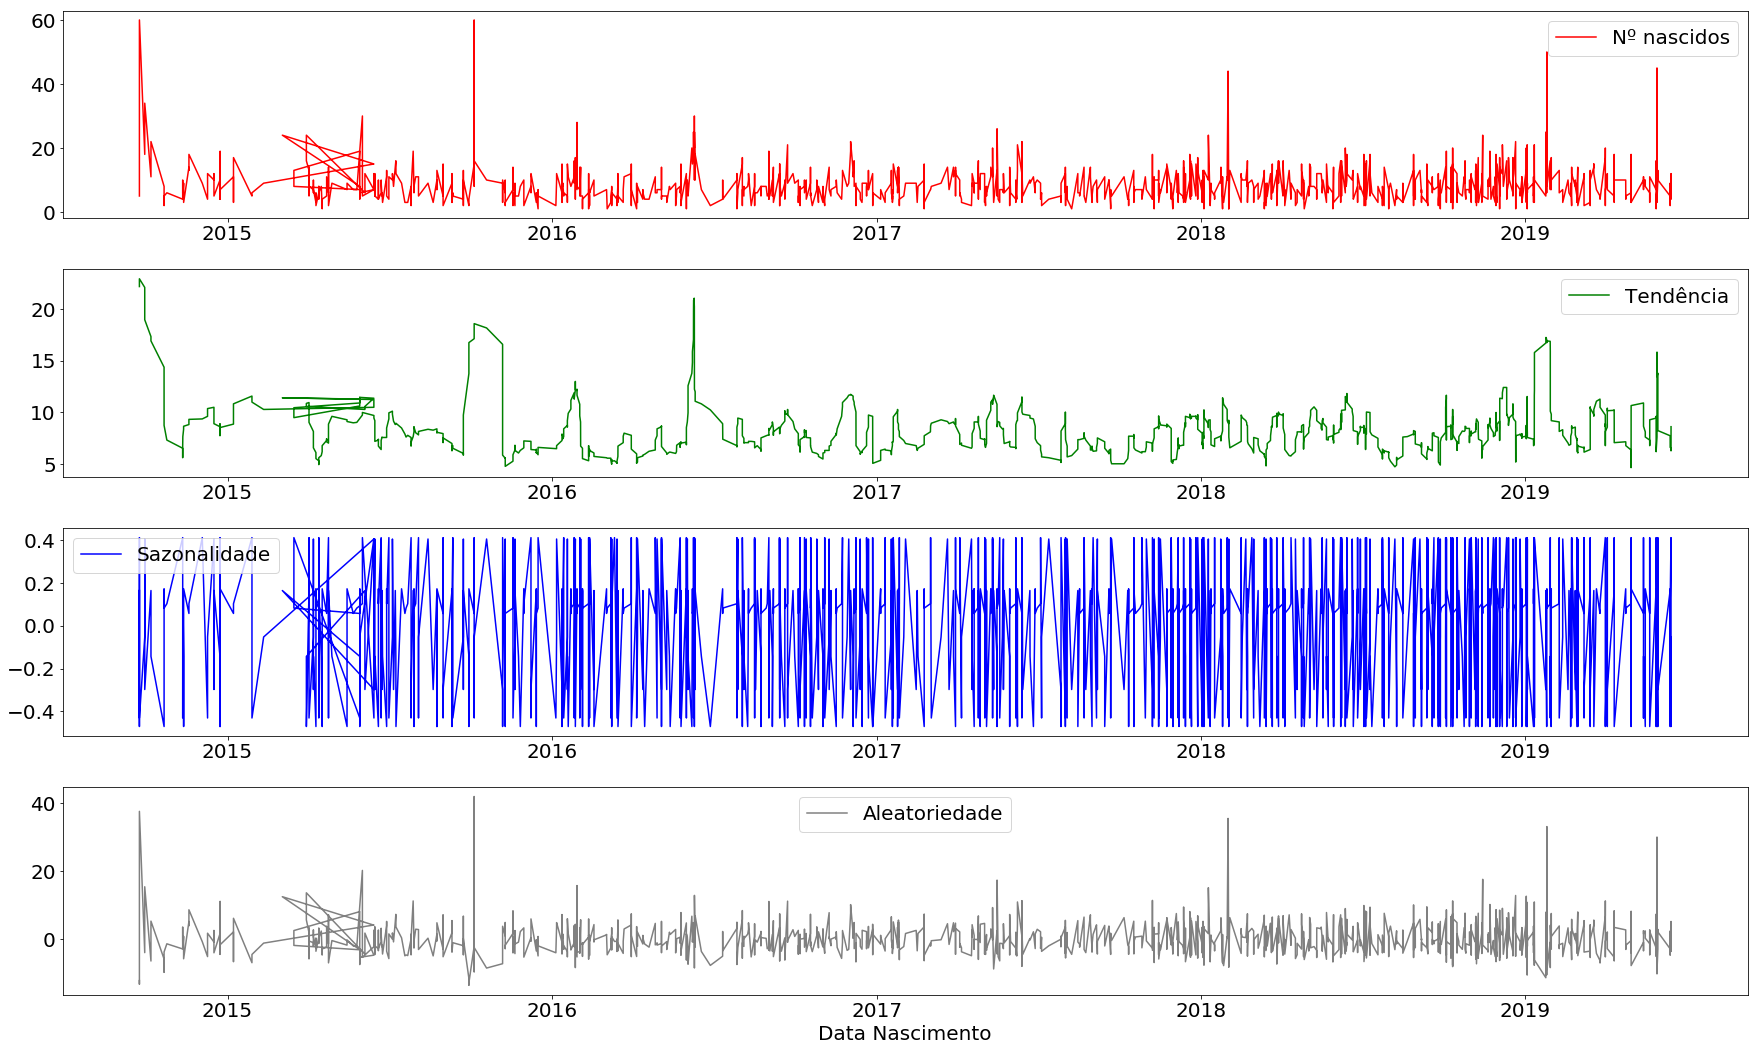

In [23]:
#Variáveis criadas para plotagem de gráfico de Série Temporal
ser_temp = serie_temp['num_nasc']
decom = seasonal_decompose(ser_temp, freq=12)

#Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])


plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20


plt.subplot(4, 1, 1)
plt.plot(ser_temp, label = 'Nº nascidos', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()

In [ ]:
#Criar uma DataFrame com mais de uma informação - juntando a série temporal + linhagens
#info_camun = 